<a href="https://colab.research.google.com/github/dheerajkumar5/Predicting-Placement-Outcomes/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Titanic.csv')
# Reads the Titanic dataset from a CSV file into a pandas DataFrame for analysis.

In [4]:
df.shape
# Returns the dimensions of the DataFrame as a tuple (number of rows, number of columns).
# Useful for quickly understanding the size of the dataset.

(891, 12)

In [5]:
df.head()
# Displays the first 5 rows of the DataFrame by default.
# Useful for previewing the structure of the dataset, column names, and initial data values.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.sample(5)
# Randomly selects 5 rows from the DataFrame.
# Useful for getting a quick snapshot of the data and identifying patterns without bias.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
121,122,0,3,"Moore, Mr. Leonard Charles",male,NaN,0,0,A4. 54510,8.0500,NaN,S
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
770,771,0,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.5000,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,363294,8.0500,NaN,S


In [7]:
df.columns
# Lists all column names in the DataFrame.
# Helps in understanding the structure of the dataset and identifying available features for analysis.

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.info()
# Provides a concise summary of the DataFrame, including:
# - Column names and their data types
# - Number of non-null values in each column
# - Memory usage of the DataFrame
# Ideal for quick inspection of dataset structure and identifying potential missing data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isnull().sum()
# Calculates the total number of missing (null) values in each column of the DataFrame.
# Useful for identifying columns with incomplete data and guiding data cleaning efforts.

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
df.duplicated().sum()
# Counts the total number of duplicate rows in the DataFrame.
# Useful for detecting redundant data and guiding efforts to clean the dataset for better accuracy in analysis.

np.int64(0)

In [11]:
df.describe()
# Generates descriptive statistics for all numeric columns in the DataFrame.
# Provides key metrics like count, mean, standard deviation, min, max, and quartiles (25%, 50%, 75%).
# Useful for summarizing and understanding the distribution and variability of numerical data.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df[['PassengerId'	,'Survived',	'Pclass',	'Age',	'SibSp'	,'Parch'	,'Fare']].corr()
# Computes the correlation matrix for the selected numerical columns.
# Shows pairwise correlation coefficients, highlighting relationships between variables (e.g., how strongly 'Age' is related to 'Fare').
# Useful for identifying linear dependencies or trends in the dataset.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


**EDA** - ***Univariate_Analysis***

***Categorical Data***

,count
Survived,
0,549
1,342


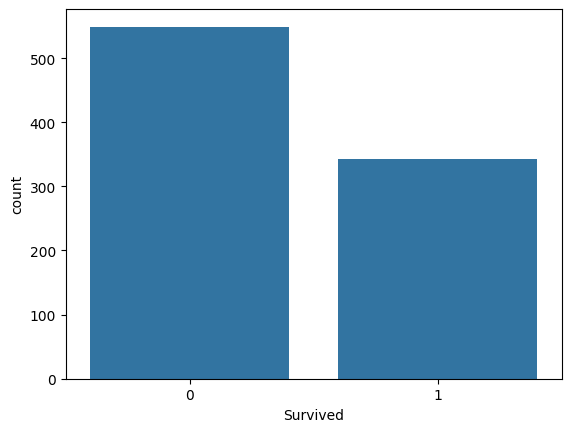

In [13]:
sns.countplot(x = 'Survived', data = df)
df['Survived'].value_counts()
# This visualization provides a clear view of survival rates at a glance.

<Axes: xlabel='Pclass', ylabel='count'>

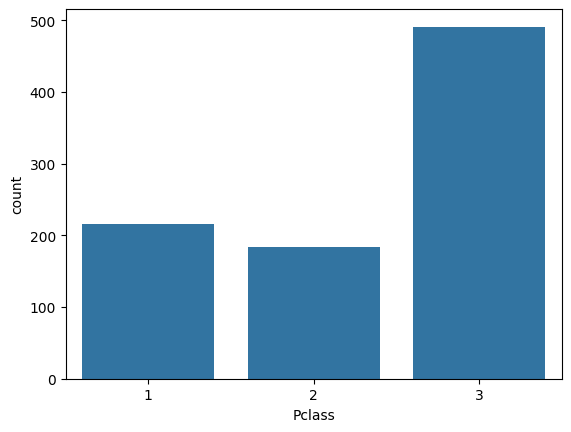

In [14]:
sns.countplot(x = 'Pclass', data = df)
# Displays a bar chart showing the count of individuals in each passenger class ('Pclass').
# The x-axis represents passenger classes (1st, 2nd, and 3rd), while the y-axis represents the count of individuals.
# The chart highlights that 'Pclass 3' has the highest count, followed by 'Pclass 1', with 'Pclass 2' being the lowest.

In [15]:
df['Sex'].value_counts()
# Displays the count of male and female passengers in the dataset.

,count
Sex,
male,577
female,314


In [16]:
df['Embarked'].value_counts()
# Displays the count of passengers who embarked from each location:
# 'S' (Southampton) has 644 passengers, the highest count.
# 'C' (Cherbourg) has 168 passengers, and 'Q' (Queenstown) has 77 passengers.

,count
Embarked,
S,644
C,168
Q,77


<Axes: ylabel='count'>

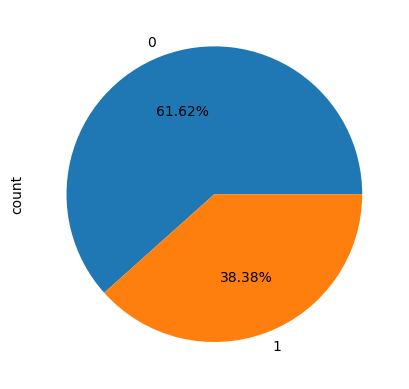

In [17]:
df['Survived'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
# Generates a pie chart to visualize the proportion of survivors (1) and non-survivors (0) in the Titanic dataset.
# The 'autopct' parameter formats and displays the percentage of each segment with two decimal precision.
# This chart clearly shows that 61.62% did not survive, while 38.38% survived.

<Axes: ylabel='count'>

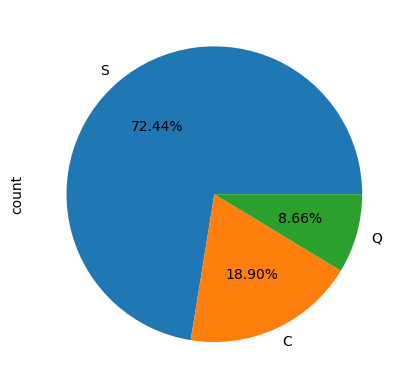

In [18]:
df['Embarked'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
# Shows the count of passengers based on their embarkation points:
# - 'S' (Southampton) has the highest count with 644 passengers.
# - 'C' (Cherbourg) follows with 168 passengers.
# - 'Q' (Queenstown) has the lowest count with 77 passengers.

***Numerical Data***

<ipython-input-21-4b32a6f77e8a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

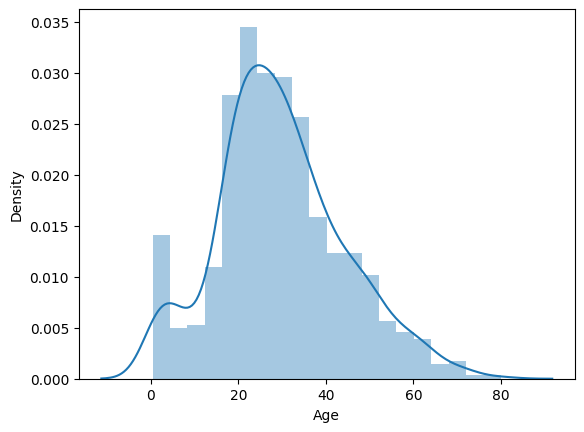

In [21]:
sns.distplot(df['Age'])
# Plots the distribution of the 'Age' column in the Titanic dataset using Seaborn.
# The histogram represents the frequency of ages, while the KDE curve smooths the data to display density.
# Provides insights into age demographics, showing a peak around 20 years and a gradual decline for older ages.
# Note: 'sns.distplot()' is deprecated; consider using 'sns.histplot()' for modern implementations.

<Axes: xlabel='Age', ylabel='Count'>

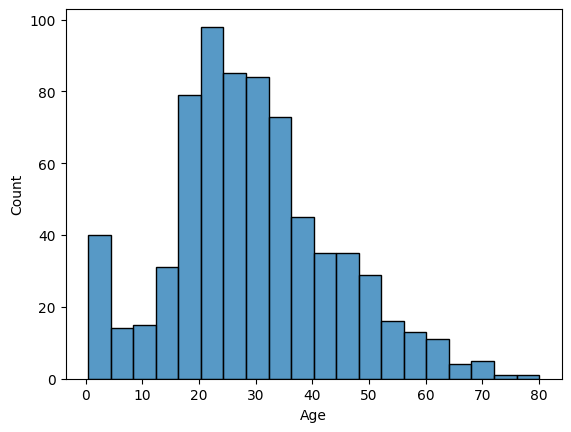

In [22]:
sns.histplot(df['Age']) #without KDE

<ipython-input-23-144e737080f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], hist = False)


Skewness : 0.38910778230082704
Kurtosis : 0.17827415364210353


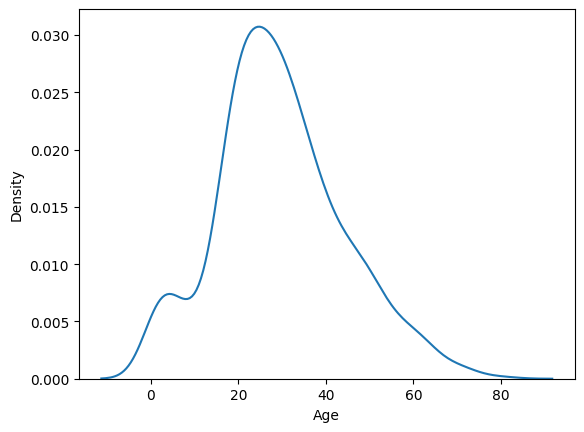

In [23]:
sns.distplot(df['Age'], hist = False)
print(f"Skewness : {df['Age'].skew()}") #slight +ve skew
print(f"Kurtosis : {df['Age'].kurtosis()}") #can be considered almost symmetric

<Axes: ylabel='Fare'>

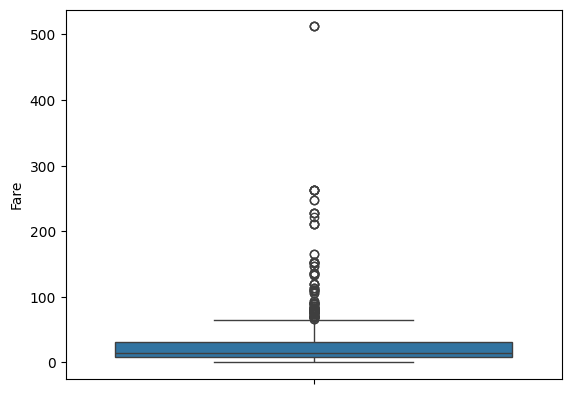

In [24]:
sns.boxplot(df['Fare'])
# Displays a box plot for the 'Fare' column in the Titanic dataset.
# Visualizes the distribution, central tendency (median), and spread of passenger ages.
# Highlights the interquartile range (IQR), outliers (beyond the whiskers), and overall variability of the age data.
# Useful for identifying age patterns and potential anomalies in the dataset.

<Axes: xlabel='Age'>

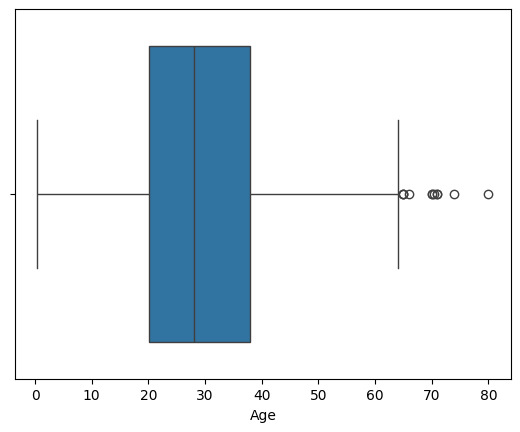

In [25]:
sns.boxplot(x = 'Age', data = df)
# Displays a box plot for the 'Age' column in the Titanic dataset.
# Visualizes the distribution, central tendency (median), and spread of passenger ages.
# Highlights the interquartile range (IQR), outliers (beyond the whiskers), and overall variability of the age data.
# Useful for identifying age patterns and potential anomalies in the dataset.

Skewness : 4.787316519674893
Kurtosis : 33.39814088089868


<ipython-input-26-1bff3c3405e3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


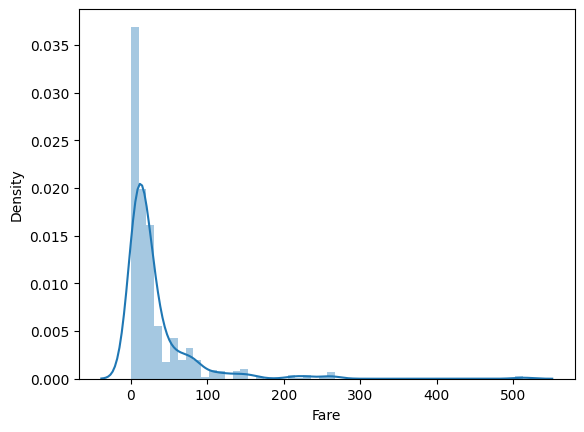

In [26]:
sns.distplot(df['Fare'])
print(f"Skewness : {df['Fare'].skew()}") #+ve or right skewed
print(f"Kurtosis : {df['Fare'].kurtosis()}") #+ve or peaked kurtosis
# Creates a distribution plot for the 'Fare' column using Seaborn.
# The histogram reveals the frequency of ticket fares, combined with a KDE curve for a smooth density estimate.
# Useful for detecting trends in ticket pricing, identifying outliers, and understanding overall fare distribution.

**Bivariate Analysis**

***Scatterplot (Numerical-Numerical)***

<Axes: xlabel='Age', ylabel='Fare'>

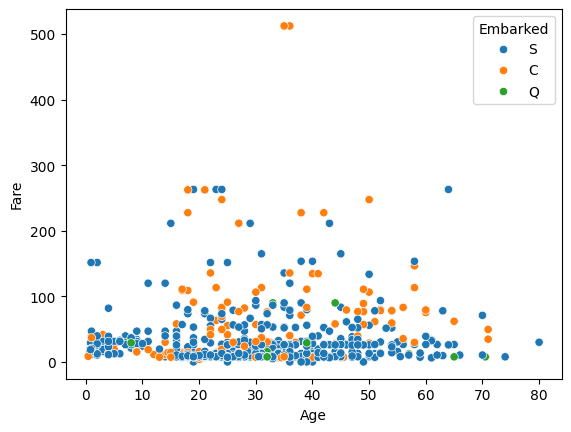

In [27]:
sns.scatterplot(x = 'Age', y = 'Fare', data = df, hue = 'Embarked')
# Creates a scatter plot with 'Age' on the x-axis and 'Fare' on the y-axis.
# Data points are color-coded based on the 'Embarked' column ('S', 'C', 'Q') for embarkation locations.
# Useful for analyzing relationships between age, fare, and embarkation point, highlighting any trends or clusters in the data.

***Numerical-Categorical***

<ipython-input-28-ae532488d18a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Pclass', y = 'Age',data = df, palette = 'coolwarm')


<Axes: xlabel='Pclass', ylabel='Age'>

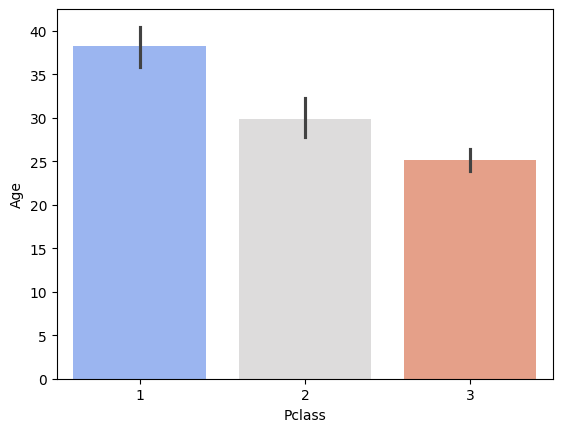

In [28]:
sns.barplot(x = 'Pclass', y = 'Age',data = df, palette = 'coolwarm')
# Generates a bar plot to compare the average age of passengers across different classes ('Pclass').
# Bars represent the mean age for each class (1, 2, and 3), with error bars indicating the confidence interval.
# Employs the 'coolwarm' palette for visual distinction, with Class 1 in blue, Class 2 in gray, and Class 3 in red.
# Reveals that passengers in Class 1 tend to be older on average, while Class 3 includes younger passengers.

<Axes: xlabel='Pclass', ylabel='Fare'>

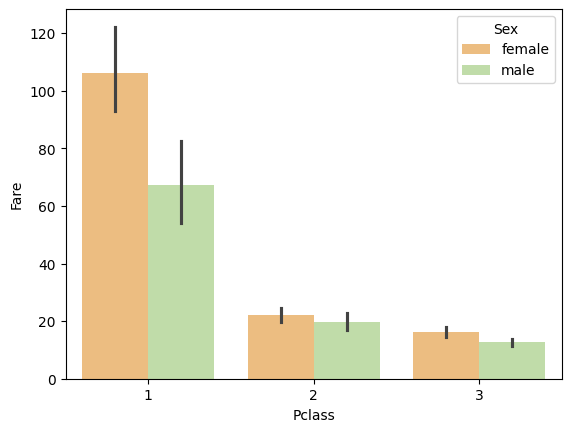

In [29]:
sns.barplot(x = 'Pclass', y = 'Fare', data = df,hue = 'Sex', palette = 'Spectral')
# Creates a count plot to visualize the distribution of passengers in different classes (Pclass), separated by gender (Sex).
# The x-axis represents the passenger classes (1, 2, and 3), while the y-axis represents the count of passengers.
# Bars are color-coded (orange for female and green for male) to highlight gender-based differences.
# Useful for demographic analysis and identifying trends in class and gender distribution among Titanic passengers.

<Axes: xlabel='Embarked', ylabel='Fare'>

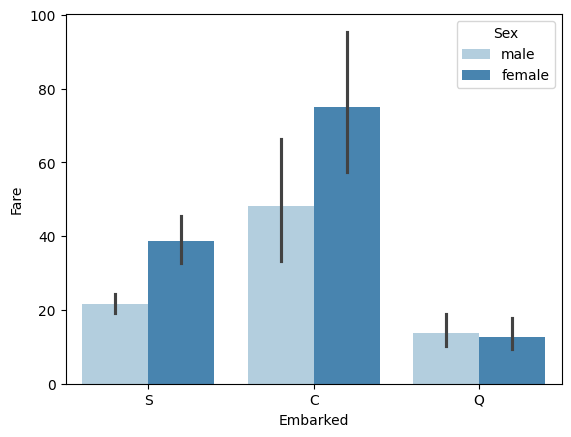

In [30]:
sns.barplot(x = 'Embarked', y = 'Fare', data = df, hue = 'Sex',palette = 'Blues')
# Creates a bar chart comparing the average fare paid by male and female passengers across different embarkation points ('S', 'C', 'Q').
# Light blue bars represent males, and dark blue bars represent females, with error bars showing fare variability.
# Useful for identifying fare patterns based on gender and embarkation point, and exploring potential socio-economic insights in the dataset.

<Axes: xlabel='Pclass', ylabel='Survived'>

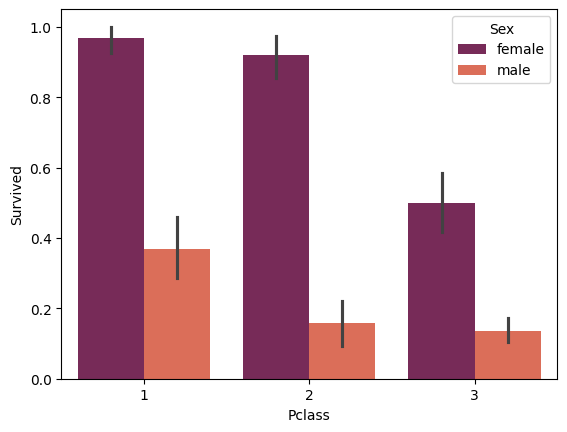

In [31]:
sns.barplot(x = 'Pclass', y= 'Survived', data = df, hue = 'Sex', palette = 'rocket')
# Calculates and displays the count of passengers based on their embarkation points.
# 'S' (Southampton): 644 passengers - the majority.
# 'C' (Cherbourg): 168 passengers.
# 'Q' (Queenstown): 77 passengers - the fewest.

<Axes: xlabel='Sex', ylabel='Age'>

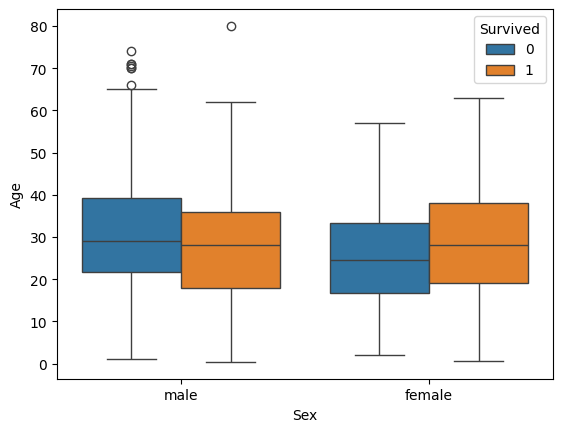

In [32]:
sns.boxplot(x = 'Sex', y = 'Age', data = df, hue = 'Survived')
# Displays a box plot comparing the distribution of ages for males and females, categorized by survival status.
# The x-axis ('Sex') divides data into male and female groups, while the y-axis ('Age') shows the age distribution.
# Each group is further split into survival status (0 for not survived, 1 for survived), represented by different colors.
# The plot includes medians, quartiles, and outliers, providing insights into age patterns and survival trends based on sex.

<ipython-input-33-0a7112d21590>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived'] == 0]['Age'], hist = False) #Compare survived with age
<ipython-input-33-0a7112d21590>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived'] == 1]['Age'], hist = Fals

<Axes: xlabel='Age', ylabel='Density'>

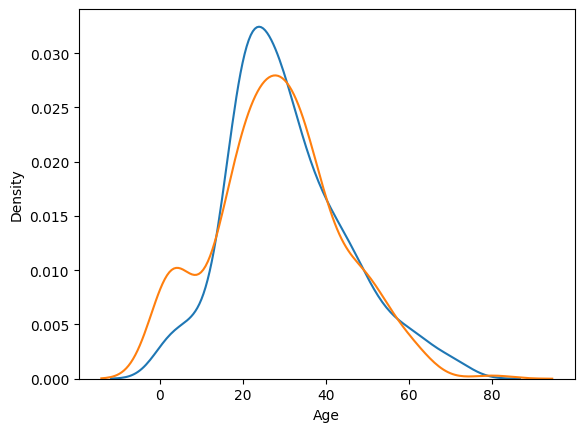

In [33]:
sns.distplot(df[df['Survived'] == 0]['Age'], hist = False) #Compare survived with age
sns.distplot(df[df['Survived'] == 1]['Age'], hist = False)

***Categorical - Categorical***

<Axes: xlabel='Survived', ylabel='Pclass'>

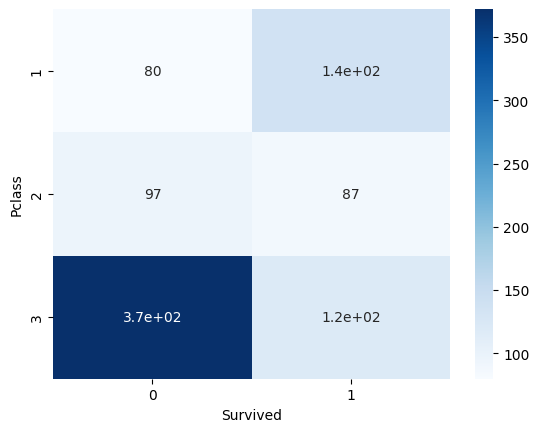

In [34]:
sns.heatmap(pd.crosstab(df['Pclass'], df['Survived']), annot = True, cmap ='Blues' )
# Generates a heatmap to visualize the correlation matrix of the dataset.
# Each cell represents the correlation coefficient between two variables, with values ranging from -1 (strong negative correlation) to 1 (strong positive correlation).
# Useful for identifying highly correlated features, which can inform feature selection or multicollinearity analysis.

<Axes: xlabel='Pclass'>

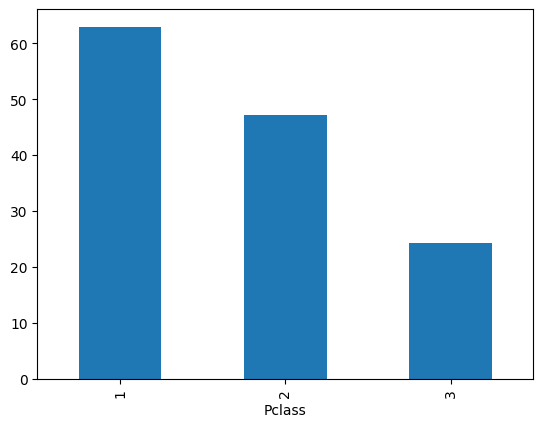

In [35]:
(df.groupby('Pclass').mean(numeric_only=True)['Survived']*100).plot(kind = 'bar')
# Creates a bar plot to display the average survival rates (%) for each passenger class (Pclass).
# Calculates the mean survival rate for numeric columns in the dataset, grouped by 'Pclass'.
# Indicates that passengers in Class 1 had the highest survival rate, followed by Class 2 and Class 3.

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


<Axes: xlabel='Sex'>

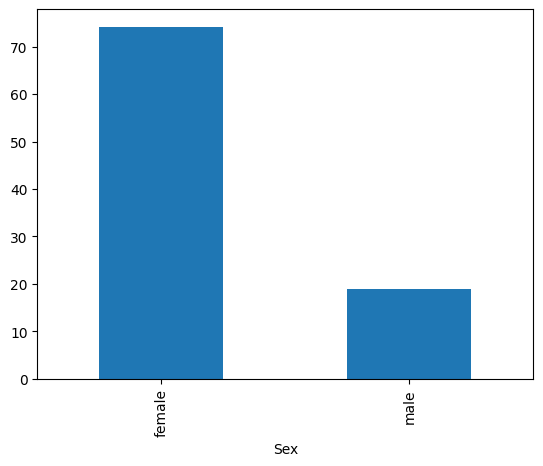

In [36]:
Distribution = df.groupby('Sex').mean(numeric_only=True)['Survived']*100
print(Distribution)
(Distribution).plot(kind = 'bar') #Very high survival rate in female

<Axes: xlabel='Embarked'>

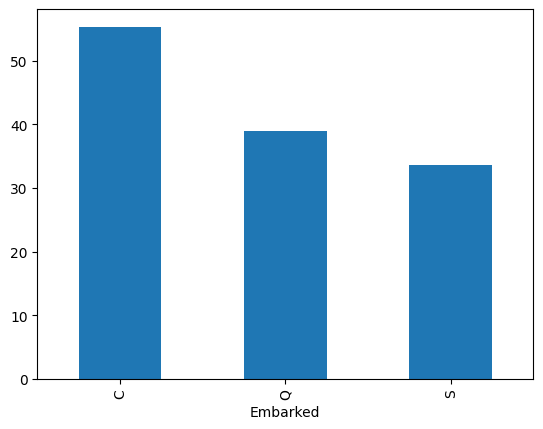

In [37]:
(df.groupby('Embarked').mean(numeric_only=True)['Survived']*100).plot(kind = 'bar')
# Creates a bar chart to display the frequency of passengers based on their embarkation points ('Embarked').
# Categories include 'C' (Cherbourg), 'Q' (Queenstown), and 'S' (Southampton).
# The height of each bar represents the number of passengers embarking from each location, making 'C' the highest, followed by 'Q' and 'S'.

In [38]:
pd.crosstab(df['SibSp'], df['Survived'])
# Creates a crosstab between 'SibSp' (number of siblings/spouses aboard) and 'Survived' (survival status).
# Rows represent 'SibSp', ranging from 0 to 8, and columns represent survival status (0: not survived, 1: survived).
# The table reveals trends in survival rates based on the number of siblings/spouses aboard.

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


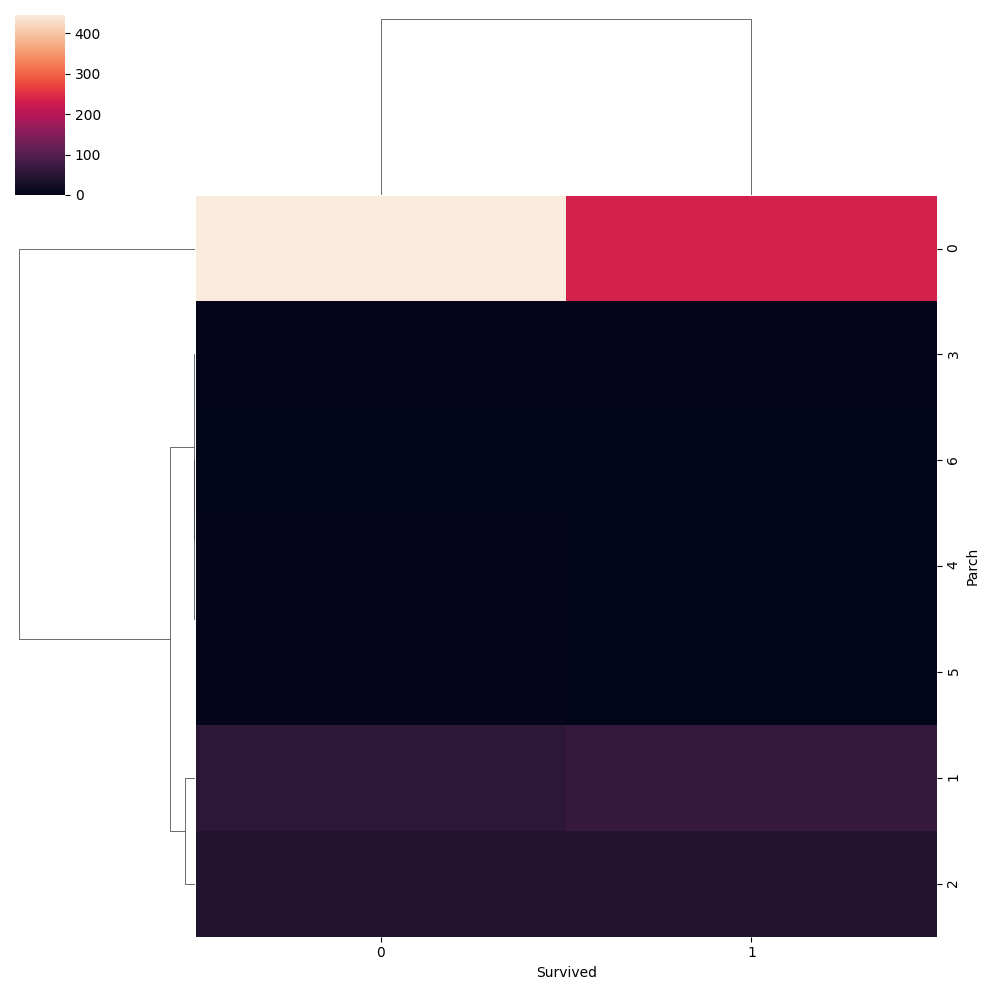

In [39]:
sns.clustermap(pd.crosstab(df['Parch'], df['Survived']))
# Creates a cluster map to visualize and group similar variables based on the correlation matrix.
# Displays hierarchical clustering using dendrograms to identify groups of variables with similar patterns or relationships.
# Color intensity represents the strength of correlation, aiding in identifying highly correlated variables.
# Useful for feature selection and multicollinearity analysis, as well as exploring patterns within the dataset.

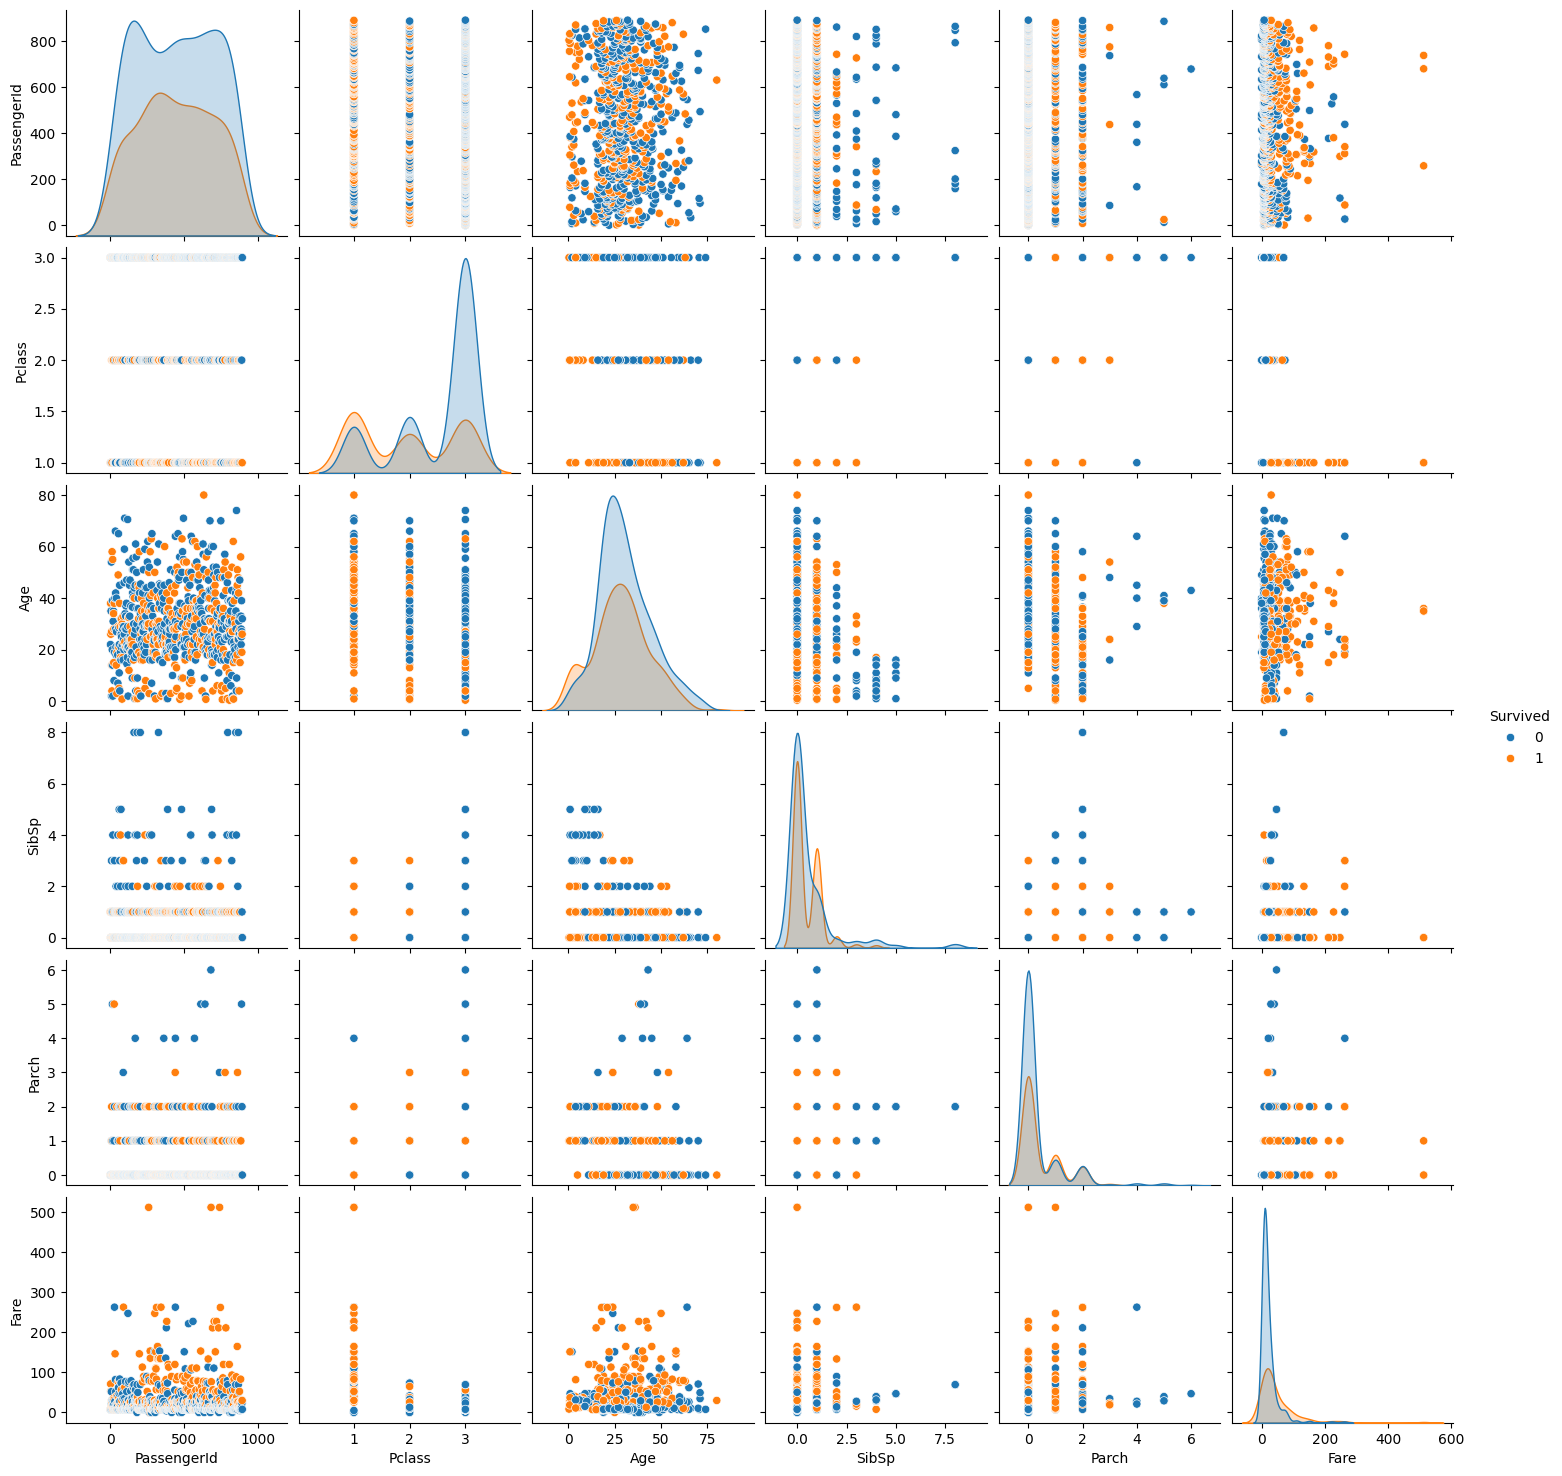

In [40]:
sns.pairplot(df, hue = 'Survived') #Comparission of all Numercial collumns

In [41]:
df1 = pd.read_csv('AirPassengers.csv')
# Utilizes US flights data to demonstrate the use of line plots and cluster plots.
# Line plots are employed to visualize trends and patterns in flight data over time (e.g., passenger counts, delays).
# Cluster plots are used to group similar data points, highlighting relationships or categories within the dataset.
# Provides insights into temporal trends and underlying data groupings, aiding in exploratory data analysis.

In [42]:
df1.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [43]:
df1.columns = ['Date', 'Passengers'] #Updated Column Names

In [44]:
df1['Month'] = (df1['Date'].str.split('-').str[1]).astype('int')
df1['Year'] = (df1['Date'].str.split('-').str[0]).astype('int')
# Extracts the month and year from the 'Date' column and creates two new columns: 'Month' and 'Year'.
# Splits the 'Date' column by the '-' separator and retrieves the month (index 1) and year (index 0) as integers.
# The 'Month' column contains the integer representation of the month (1-12), and the 'Year' column contains the four-digit year.
# Useful for breaking down date data for time-based analysis or grouping by specific

In [45]:
df1.head()

,Date,Passengers,Month,Year
0,1949-01,112,1,1949
1,1949-02,118,2,1949
2,1949-03,132,3,1949
3,1949-04,129,4,1949
4,1949-05,121,5,1949


<Axes: xlabel='Year', ylabel='Passengers'>

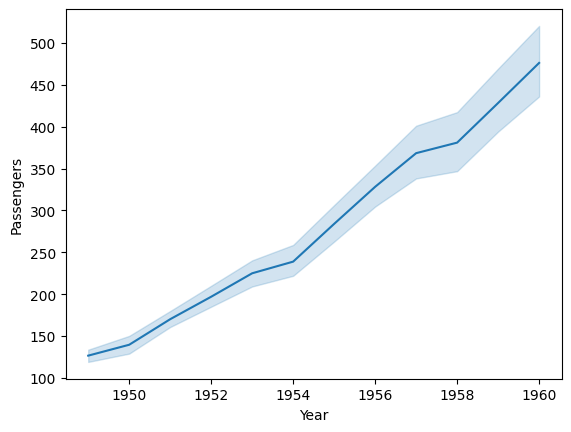

In [46]:
sns.lineplot(x = 'Year', y = 'Passengers', data = df1, legend= 'auto')
# This line plot illustrates the upward trend in passenger numbers from 1950 to 1960.
# The shaded area around the line indicates the confidence interval, emphasizing data variability.

In [47]:
pd.pivot_table(df1, values = 'Passengers', index = 'Month', columns = 'Year')

Year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
Month,,,,,,,,,,,,
1,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
2,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
3,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
4,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
5,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
6,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
7,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
8,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
9,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='Year', ylabel='Month'>

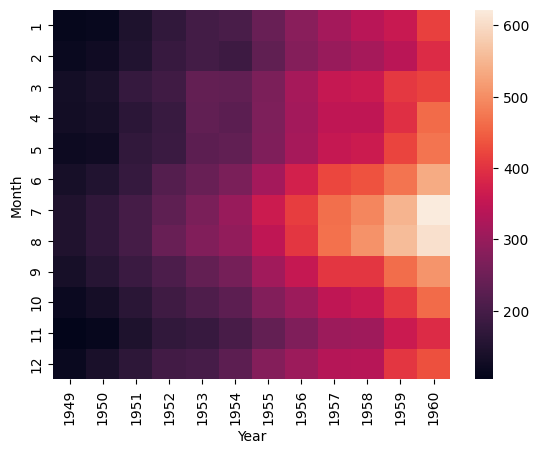

In [48]:
sns.heatmap(pd.pivot_table(df1, values = 'Passengers', index = 'Month', columns = 'Year'))
# Generates a clustered heatmap to visualize passenger numbers across months and years.
# Groups similar years and months based on patterns in the data using hierarchical clustering and dendrograms.
# Color intensity reflects passenger counts, with lighter colors indicating higher numbers.
# Useful for identifying trends, seasonal patterns, or anomalies in passenger traffic over time.

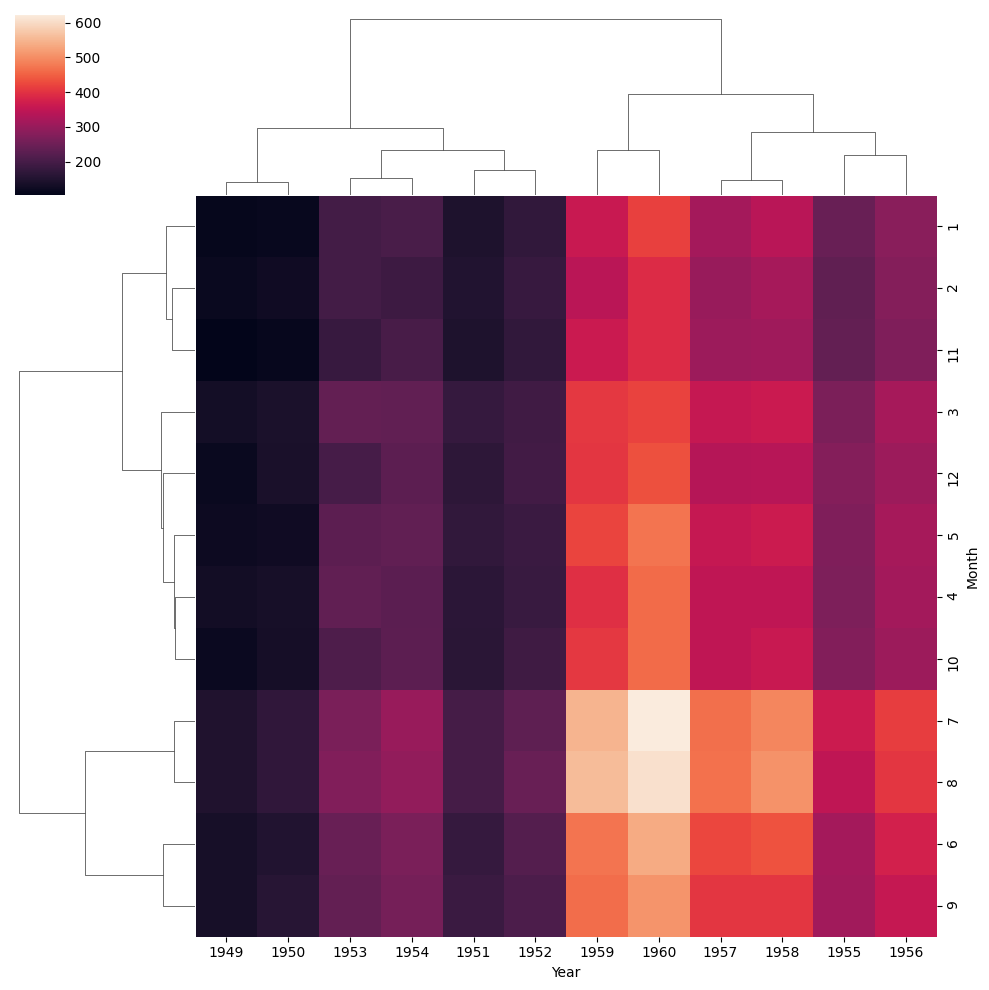

In [49]:
sns.clustermap(pd.pivot_table(df1, values = 'Passengers', index = 'Month', columns = 'Year'))
# Converts the 'Date' column into new columns 'Month' and 'Year' for detailed temporal analysis.
# Extracts the month as an integer (1-12) and the year as an integer (e.g., 1949, 1960).
# Enables grouping and clustering of data by months and years for trend analysis.

In [50]:
df2 = pd.read_csv('Iris_Dataset.csv')

In [53]:
df2.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


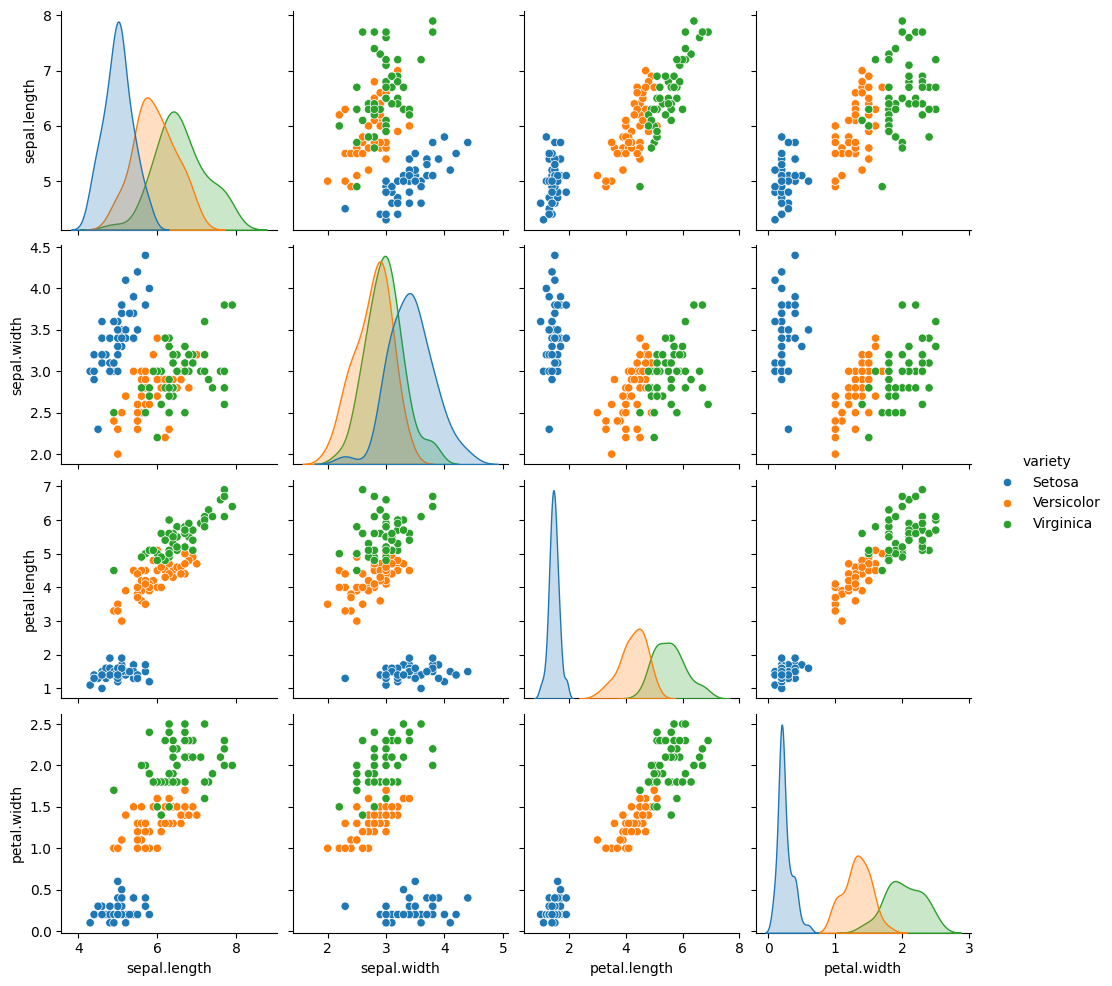

In [65]:
sns.pairplot(df2, hue = 'variety')
# Generates a pairplot to visualize relationships between numerical features in the dataset.
# Each diagonal subplot shows the distribution of individual features using histograms or KDEs.
# Off-diagonal subplots display scatter plots of feature pairs, highlighting correlations and patterns.
# Data points are color-coded based on the 'Survived' column, allowing for visual differentiation between classes (e.g., survivors vs. non-survivors).
# Useful for identifying feature interactions, trends, clusters, or separations that can inform further analysis or modeling.